##  <font color='blue'> Train Data

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train=pd.read_csv('TRAIN.csv')
train.head()

,LID,CHNL,SELLER,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,...,DLQSTATUS,MODFLAG,MITYPE,RELMORTGIND,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS,FORCLOSED
0,946681740815,B,"Jpmorgan Chase Bank, National Association",8.000,100000.0,360,32000,52000,1,359,...,0,N,NaN,N,4,2,4,363,17,False
1,921089628109,R,"Gmac Mortgage, Llc",7.625,100000.0,180,42000,62000,0,180,...,0,N,NaN,N,4,3,5,184,32,False
2,738779422112,C,"Flagstar Bank, Fsb",8.000,226000.0,180,32000,52000,1,179,...,0,N,NaN,N,4,2,4,183,19,False
3,615798070845,R,Other,8.205,143000.0,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,21,False
4,345601060557,R,Other,8.500,46000.0,360,32000,52000,0,360,...,0,N,NaN,N,3,2,4,363,17,False


Reading Train data

## Sorting

In [65]:
train=train.drop(['LID','ZIP'],1)
train.describe()

,ORIGRATE,ORIGUPB,ORIGTERM,ORIGDATE,FSTPAY,LOANAGE,REMMNTHS,ADJRMTHS,MATDT,OLTV,...,NO_UNITS,MSA,MIPCT,DLQSTATUS,MITYPE,ACTPER_MO,ORIGDATE_MO,FSTPAY_MO,MATDT_MO,NMONTHS
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,199999.000000,...,200000.000000,200000.000000,67454.000000,200000.000000,67454.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,8.299283,121416.440000,329.531600,40975.225610,58963.939695,0.478755,329.052845,328.061880,49640.795250,76.757834,...,1.034590,26635.619200,24.268909,0.001580,1.035847,4.051490,2.604845,4.572735,333.104335,28.072110
std,0.425457,56948.813276,67.001587,14458.304094,11987.572825,1.173612,67.036180,67.456452,12714.191188,16.445143,...,0.229268,13944.631937,6.267456,0.041322,0.186228,0.816598,1.437528,1.430262,67.060201,30.035923
min,2.990000,8000.000000,60.000000,11999.000000,12000.000000,-1.000000,56.000000,1.000000,12005.000000,1.000000,...,1.000000,0.000000,6.000000,0.000000,1.000000,3.000000,-12.000000,-11.000000,60.000000,1.000000
25%,8.000000,77000.000000,360.000000,32000.000000,52000.000000,0.000000,359.000000,358.000000,42030.000000,70.000000,...,1.000000,16980.000000,18.000000,0.000000,1.000000,3.000000,2.000000,4.000000,362.000000,13.000000
50%,8.250000,113000.000000,360.000000,42000.000000,62000.000000,0.000000,360.000000,359.000000,52030.000000,80.000000,...,1.000000,29820.000000,25.000000,0.000000,1.000000,4.000000,3.000000,5.000000,363.000000,20.000000
75%,8.500000,157000.000000,360.000000,52000.000000,62000.000000,1.000000,360.000000,360.000000,62015.000000,90.000000,...,1.000000,38060.000000,30.000000,0.000000,1.000000,5.000000,4.000000,5.000000,364.000000,32.000000
max,11.500000,486000.000000,360.000000,121999.000000,121999.000000,16.000000,361.000000,360.000000,122029.000000,97.000000,...,4.000000,49740.000000,50.000000,4.000000,3.000000,5.000000,5.000000,7.000000,366.000000,242.000000


I believe 'LID' and 'ZIP' have absolute no correlation with the prediction of NMONTHS nor FORCLOSED, so I just take them out of the data immediately.

In [66]:
train['FORCLOSED'].value_counts(normalize=True)

False    0.988455
True     0.011545
Name: FORCLOSED, dtype: float64

In [67]:
train['NMONTHS'].describe()

count    200000.000000
mean         28.072110
std          30.035923
min           1.000000
25%          13.000000
50%          20.000000
75%          32.000000
max         242.000000
Name: NMONTHS, dtype: float64

Checking the status of NMONTHS and FORCLOSED， not useful

In [68]:
train['CHNL'].replace(('B','R','C'),(0,1,2),inplace=True)
train['FIRSTFLAG'].replace(('Y','N'),(0,1),inplace=True)
train['PURPOSE'].replace(('C','R','P','U'),(0,1,2,3),inplace=True)
train['PROP'].replace(('CO','CP','PU','MH','SF'),(0,1,2,3,4),inplace=True)
train['OCCSTAT'].replace(('P','S','I','U'),(0,1,2,3),inplace=True)
train['RELMORTGIND'].replace(('Y','N'),(0,1),inplace=True)
train['MODFLAG'].replace(('Y','N'),(0,1),inplace=True)

The reasoning of this step is because I want to check the correlation of each columns by using heatmap, but I'm not sure whether the heatmap will work on String variable or not,
so I converted all string variable except state and seller name (because there are two many names of company and of state, they are not the primary focus anyway)

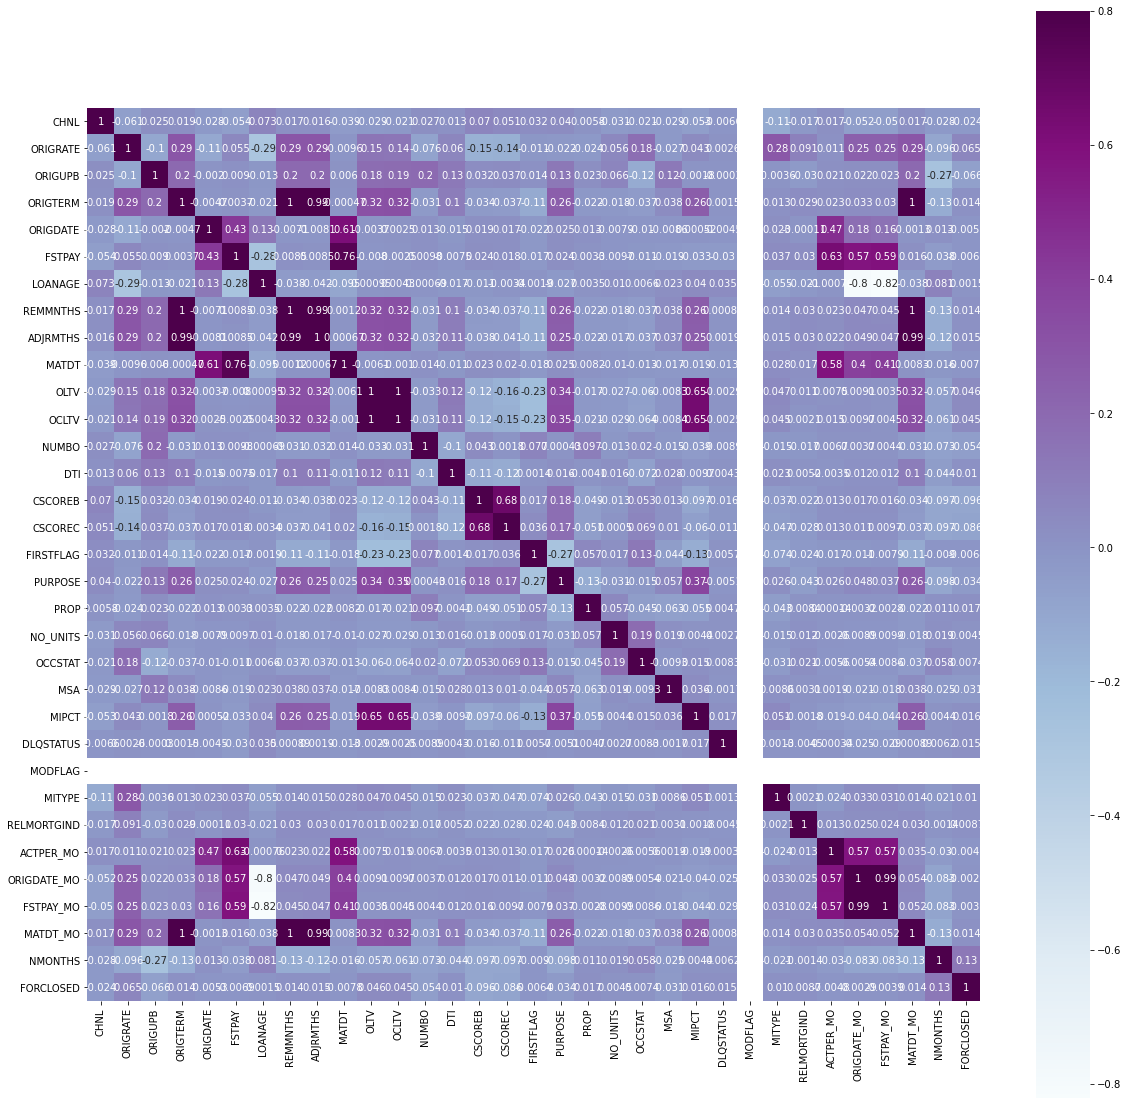

In [69]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

By looking at this headmap, I'm able to see the correlation between each column.

In [70]:
train=train.drop(['MODFLAG'],1)

I've taken out MODFLAG, I see that the row or cloumn of MODFLAG is blank, this is beacuse all variable in the MODFLAG is the same. Therefore, MODFLAG should have no 
effect on the prediction anyway.

"During the coding process, in order to achieve a more accurate prediction, I tried to take out some of the repeated and direct correlated column, such as ACTPER_MO.
This is because MATDT_MO - REMMNTHS = ACTPER_MO. By taken out ACTPER_MO, I hope to give less weight on MATDT_MO and REMMNTHS which generate a less biased result. However,
I didn't see this would make much of difference, Therefore, I added ACTPER_MO back in the data."

In [71]:
train.shape

(200000, 35)

### NULL

In [72]:
train.isnull().sum()

CHNL                0
SELLER              0
ORIGRATE            0
ORIGUPB             0
ORIGTERM            0
ORIGDATE            0
FSTPAY              0
LOANAGE             0
REMMNTHS            0
ADJRMTHS            0
MATDT               0
OLTV                1
OCLTV           41825
NUMBO              86
DTI              7511
CSCOREB          3867
CSCOREC        104041
FIRSTFLAG         112
PURPOSE             0
PROP                0
NO_UNITS            0
OCCSTAT             0
STATE               0
MSA                 0
MIPCT          132546
IO             194589
DLQSTATUS           0
MITYPE         132546
RELMORTGIND         0
ACTPER_MO           0
ORIGDATE_MO         0
FSTPAY_MO           0
MATDT_MO            0
NMONTHS             0
FORCLOSED           0
dtype: int64

After get rid of some obviously useless columns, next step is to deal with the Null variables. 

checking if there are any.

In [73]:
train['OLTV'].fillna(train['OLTV'].value_counts().mean(skipna=True),inplace=True)
train['OCLTV'].fillna(train['OCLTV'].value_counts().mean(skipna=True),inplace=True)
train['NUMBO'].fillna(train['NUMBO'].value_counts().mean(skipna=True),inplace=True)
train['DTI'].fillna(train['DTI'].value_counts().mean(skipna=True),inplace=True)
train['CSCOREB'].fillna(train['CSCOREB'].value_counts().mean(skipna=True),inplace=True)
train['FIRSTFLAG'].fillna(train['FIRSTFLAG'].value_counts().idxmax(),inplace=True)
train=train.drop(['CSCOREC','MIPCT','IO','MITYPE'],1)
train.isnull().sum()

CHNL           0
SELLER         0
ORIGRATE       0
ORIGUPB        0
ORIGTERM       0
ORIGDATE       0
FSTPAY         0
LOANAGE        0
REMMNTHS       0
ADJRMTHS       0
MATDT          0
OLTV           0
OCLTV          0
NUMBO          0
DTI            0
CSCOREB        0
FIRSTFLAG      0
PURPOSE        0
PROP           0
NO_UNITS       0
OCCSTAT        0
STATE          0
MSA            0
DLQSTATUS      0
RELMORTGIND    0
ACTPER_MO      0
ORIGDATE_MO    0
FSTPAY_MO      0
MATDT_MO       0
NMONTHS        0
FORCLOSED      0
dtype: int64

What I did to fill in the missing variable is that 

if the variable type is numerical, I would assume the missing variable is the mean of other variables in this column.

if the variable type is String, I would assume the missing variable is the most frequent string showed in this column.

However, this will become problematic if majority of variable is missing, therefore, I'll just take them out of the data.

In this case, the training data has 10 columns with missing data. 4 of them even have more than 100,000 missing data. So I drop CSCOREC, MIPCT, IO, MITYPE

In [74]:
train.shape

(200000, 31)

### Outliers

(200000,)

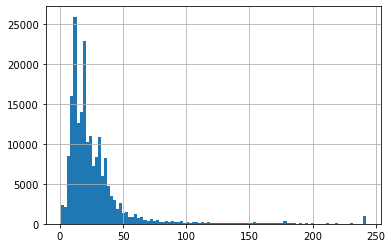

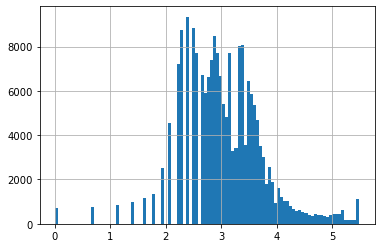

In [75]:
train['NMONTHS'].hist(bins=100)
plt.figure()
train['NMONTHS']=np.log(train['NMONTHS'])
train['NMONTHS'].hist(bins=100)
train['NMONTHS'].shape

After deal with the Null variables. Last I want to clean up the data outlier for a more accurate prediction.

Most of the NMONTHS data is distributed on the left and not normal distributed. By taking log to all the NOMONTHS variable, we can have a normal distributed data as showing in the graph.

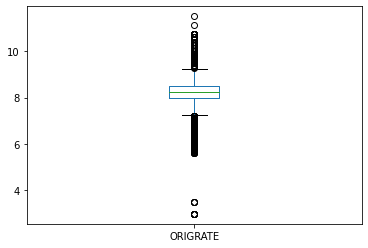

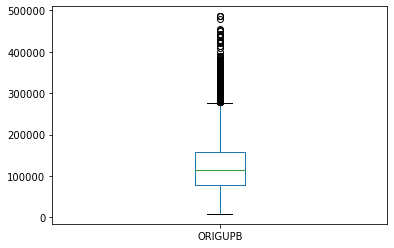

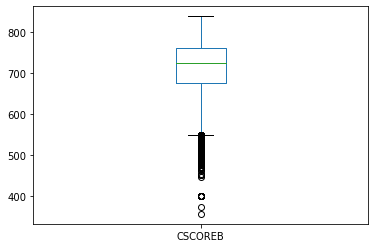

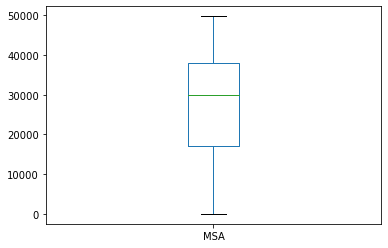

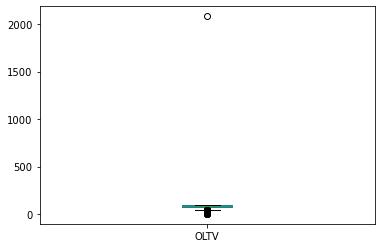

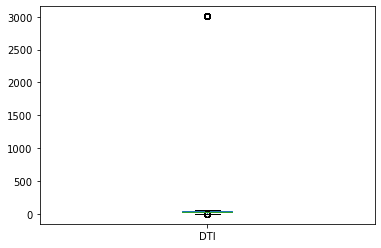

In [76]:
train['ORIGRATE'].plot.box()
plt.figure()
train['ORIGUPB'].plot.box()
plt.figure()
train['CSCOREB'].plot.box()
plt.figure()
train['MSA'].plot.box()
plt.figure()
train['OLTV'].plot.box()
plt.figure()
train['DTI'].plot.box()

Next is to check that is there any other columns I need to change the distribution to normal in order to deal with outliers. 

By drawing a box plot for all columns with numerical variable, we can see those outliers. 

MSA, OLTV, DTI's distribution is optimal with only few outliers and close to the mean data. However, ORIGRATE, ORIGUPB, CSCOREB have a lot of outliers distributed all over the place.

In [77]:
#train['ORIGRATE']=np.log(train['ORIGRATE'])
#train['ORIGUPB']=np.log(train['ORIGUPB'])
#train['CSCOREB']=np.log(train['CSCOREB'])

I was going to deal with those data's outliers, but I found out that it will actually cause the FORCLOSED predictor to work abnormally. 
(Predicting both train and test data with all False and zero True), Therefore, I have to just not deal with those outliers.

In [78]:
train.shape

(200000, 31)

## <font color='blue'> Test Data

In [79]:
test=pd.read_csv('TESTPARTIAL.csv')
test['CHNL'].replace(('B','R','C'),(0,1,2),inplace=True)
test['FIRSTFLAG'].replace(('Y','N'),(0,1),inplace=True)
test['PURPOSE'].replace(('C','R','P','U'),(0,1,2,3),inplace=True)
test['PROP'].replace(('CO','CP','PU','MH','SF'),(0,1,2,3,4),inplace=True)
test['OCCSTAT'].replace(('P','S','I','U'),(0,1,2,3),inplace=True)
test['RELMORTGIND'].replace(('Y','N'),(0,1),inplace=True)
test['MODFLAG'].replace(('Y','N'),(0,1),inplace=True)
print(test.head())
print(test.shape)

            LID  CHNL                   SELLER  ORIGRATE   ORIGUPB  ORIGTERM  \
0  790182552271     1                    Other     8.750   64000.0       360   
1  466910965031     2  Jpmorgan Chase Bank, Na     8.500  142000.0       360   
2  423006640587     1  Jpmorgan Chase Bank, Na     8.375  104000.0       360   
3  485913250921     0       Citimortgage, Inc.     8.500  119000.0       360   
4  611522962273     1                    Other     8.375  214000.0       360   

   ORIGDATE  FSTPAY  LOANAGE  REMMNTHS  ...  MIPCT   IO  DLQSTATUS  MODFLAG  \
0     52000   72000        0       360  ...    NaN  NaN          0        1   
1     32000   52000        1       359  ...   30.0  NaN          0        1   
2     42000   62000        1       359  ...   30.0  NaN          0        1   
3     42000   62000        0       360  ...   30.0  NaN          0        1   
4     42000   62000        1       359  ...    NaN  NaN          0        1   

   MITYPE  RELMORTGIND  ACTPER_MO  ORIGDATE_

Catagorize string type data as numerical value as well, this is because I need to combine the train data and test data in the later stage. 

In [83]:
t=test.drop(['LID','ZIP','MODFLAG'],1)
t.isnull().sum()

CHNL               0
SELLER             0
ORIGRATE           0
ORIGUPB            0
ORIGTERM           0
ORIGDATE           0
FSTPAY             0
LOANAGE            0
REMMNTHS           0
ADJRMTHS           0
MATDT              0
OLTV               0
OCLTV          14781
NUMBO             24
DTI             2631
CSCOREB         1331
CSCOREC        37197
FIRSTFLAG         30
PURPOSE            0
PROP               0
NO_UNITS           0
OCCSTAT            0
STATE              0
MSA                0
MIPCT          47055
IO             69144
DLQSTATUS          0
MITYPE         47055
RELMORTGIND        0
ACTPER_MO          0
ORIGDATE_MO        0
FSTPAY_MO          0
MATDT_MO           0
dtype: int64

Drop anything that's already been dropped by train data because not going to use them for prediction anyway.

In [84]:
t['OCLTV'].fillna(t['OCLTV'].value_counts().mean(skipna=True),inplace=True)
t['NUMBO'].fillna(t['NUMBO'].value_counts().mean(skipna=True),inplace=True)
t['DTI'].fillna(t['DTI'].value_counts().mean(skipna=True),inplace=True)
t['CSCOREB'].fillna(t['CSCOREB'].value_counts().mean(skipna=True),inplace=True)
t['FIRSTFLAG'].fillna(t['FIRSTFLAG'].value_counts().idxmax(),inplace=True)
t=t.drop(['CSCOREC','MIPCT','IO','MITYPE'],1)
t.isnull().sum()

CHNL           0
SELLER         0
ORIGRATE       0
ORIGUPB        0
ORIGTERM       0
ORIGDATE       0
FSTPAY         0
LOANAGE        0
REMMNTHS       0
ADJRMTHS       0
MATDT          0
OLTV           0
OCLTV          0
NUMBO          0
DTI            0
CSCOREB        0
FIRSTFLAG      0
PURPOSE        0
PROP           0
NO_UNITS       0
OCCSTAT        0
STATE          0
MSA            0
DLQSTATUS      0
RELMORTGIND    0
ACTPER_MO      0
ORIGDATE_MO    0
FSTPAY_MO      0
MATDT_MO       0
dtype: int64

Same as train data, fill in the null data and drop any column that has over half of data missing.

In [85]:
#t['ORIGRATE']=np.log(t['ORIGRATE'])
#t['ORIGUPB']=np.log(t['ORIGUPB'])
#t['CSCOREB']=np.log(t['CSCOREB'])
print(train.shape)
print(t.head)

(200000, 31)
<bound method NDFrame.head of        CHNL                                   SELLER  ORIGRATE   ORIGUPB  \
0         1                                    Other     8.750   64000.0   
1         2                  Jpmorgan Chase Bank, Na     8.500  142000.0   
2         1                  Jpmorgan Chase Bank, Na     8.375  104000.0   
3         0                       Citimortgage, Inc.     8.500  119000.0   
4         1                                    Other     8.375  214000.0   
...     ...                                      ...       ...       ...   
71192     2                             Regions Bank     8.750   51000.0   
71193     1  Bishops Gate Residential Mortgage Trust     8.125  240000.0   
71194     1                             Regions Bank     8.125   50000.0   
71195     2                                    Other     8.250  119000.0   
71196     1  Bishops Gate Residential Mortgage Trust     8.250   62000.0   

       ORIGTERM  ORIGDATE  FSTPAY  LOANAGE  

# <font color='blue'> NMONTHS Predictor by Linear Regression

In [86]:
train_test = pd.concat([train,t],axis=0)
print(train_test.head())
xt = train_test.drop(['FORCLOSED','NMONTHS'],axis=1)

   CHNL                                     SELLER  ORIGRATE   ORIGUPB  \
0     0  Jpmorgan Chase Bank, National Association     8.000  100000.0   
1     1                         Gmac Mortgage, Llc     7.625  100000.0   
2     2                         Flagstar Bank, Fsb     8.000  226000.0   
3     1                                      Other     8.205  143000.0   
4     1                                      Other     8.500   46000.0   

   ORIGTERM  ORIGDATE  FSTPAY  LOANAGE  REMMNTHS  ADJRMTHS  ...  STATE    MSA  \
0       360     32000   52000        1       359       359  ...     GA  12060   
1       180     42000   62000        0       180       180  ...     CA  12540   
2       180     32000   52000        1       179       178  ...     WA  42660   
3       360     32000   52000        0       360       360  ...     NM  42140   
4       360     32000   52000        0       360       360  ...     IL  41180   

   DLQSTATUS  RELMORTGIND  ACTPER_MO  ORIGDATE_MO  FSTPAY_MO  MATDT_

In [87]:
xt=pd.get_dummies(xt)
x_mon = xt[train_test['NMONTHS'].notnull()]
t_mon = xt[train_test['NMONTHS'].isnull()]
y=train.NMONTHS
x_mon.shape,t_mon.shape

((200000, 103), (71197, 103))

Combining the Test data and Train data together called 'xt', and transform xt into a dummy variable,then form train data "x_mon" and test data "t_mon" dummies from xt dummy variable.
The reason of this step is because, there are some states showed in the Test data but not in the Train data, if I transform each data into dummies individually, then I would have
a different length of columns. It will cause error in the prediction later. 

### Train Data NMONTHS Prediction and Mean Difference

In [88]:
reg1=LinearRegression().fit(x_mon,y)
ypredict=reg1.predict(x_mon)
emdiff=sum(abs(ypredict-y))/len(y)
mdiff=sum(abs(np.exp(ypredict)-np.exp(y)))/len(y)
print(mdiff,emdiff)
print(np.exp(ypredict),np.exp(y))

13.628529831951079 0.4783817361459834
[25.9610486  31.03303867 14.76183849 ... 33.31400026 24.22438628
 23.80633794] 0         17.0
1         32.0
2         19.0
3         21.0
4         17.0
          ... 
199995    14.0
199996    23.0
199997    17.0
199998    40.0
199999    29.0
Name: NMONTHS, Length: 200000, dtype: float64


I already sorted out the data, what need to do is just build a regression model and put data into it. 

Since I changed the distribution of NMONTHS to normal, after the prediction, I need to take exponential of the predicted NMONTHS to transfer back to the regular value.

<font color='red'> In my prediction, I have a 13.63 Months mean different error.

### Test Data NMONTHS Prediction

In [89]:
test_predict_mon=reg1.predict(t_mon)
print(np.exp(test_predict_mon))

[18.82840763 20.96081717 19.11825882 ... 43.08386863 29.09174494
 30.83912219]


Above is the prediction for NMONTHS in Test Data which is also in the predictions.csv

# <font color='blue'> Forclosed Predictor by Logistic Regression

In [90]:
train_test.shape

(271197, 31)

In [91]:
zt = train_test.drop(['FORCLOSED','NMONTHS'],axis=1)
zt=pd.get_dummies(zt)
x_for = zt[train_test['FORCLOSED'].notnull()]
t_for = zt[train_test['FORCLOSED'].isnull()]
z=train.FORCLOSED
x_for.shape,t_for.shape

((200000, 103), (71197, 103))

Combining the Test data and Train data together called 'zt', and transform zt into a dummy variable,then form train data "x_for" and test data "t_for" dummies from zt dummy variable. The reason is the same as for NMONTHS.

In [92]:
z.value_counts(normalize=True)

False    0.988455
True     0.011545
Name: FORCLOSED, dtype: float64

### Train Data FORCLOSED Prediction (With Full 200k Data)

In [93]:
model=LogisticRegression(random_state=None).fit(x_for,z)
z_predict_full=model.predict(x_for)
unique, counts = np.unique(z_predict_full, return_counts=True)
dict(zip(unique, counts))

{False: 200000}

In [94]:
model.score(x_for,z),accuracy_score(z,z_predict_full)

(0.988455, 0.988455)

After sorted out the dummy variable, what need to do is to build a Logistic regression model and put data into it.

with full 200,000 data, the prediction comes out to be all False and zero True, and the accuracy_score is 98.8% which doesn't really mean anything since 
there were 98.8% False at the begining anyway.

### Test Data FORCLOSED Prediction

In [95]:
test_predict_full=model.predict(t_for)
unique0, counts0 = np.unique(test_predict_full, return_counts=True)
dict(zip(unique0, counts0))

{False: 71129, True: 68}

In [96]:
test_predict_full,test_predict_full.shape

(array([False, False, False, ..., False, False, False]), (71197,))

Above is the prediction for FORCLOSED in Test Data which is also in the predictionsd.csv

We predict 71129 False and 68 True

### Train Data FORCLOSED Prediction （Trying to make FP=50%)

In [97]:
train_false = x_for[train.FORCLOSED==False]
train_true=x_for[train.FORCLOSED==True]
train_false.shape,train_true.shape

((197691, 103), (2309, 103))

Now we start to manipulate the data in order to achieve False positive rate as close to 50% and True positive rate as high as posible

In [98]:
false_resample = resample(train_false,replace=False,n_samples=1700, random_state=123)
false_resample['FORCLOSED'] = False
train_true['FORCLOSED']= True
train_resample = pd.concat([false_resample,train_true])
train_resample.FORCLOSED.value_counts()

True     2309
False    1700
Name: FORCLOSED, dtype: int64

I believe the reason that caused full data prediction to predict almost everything to be False is because the uneven distribution of False and True FORCLOED in the Train data.
One way I can think of to solve this problem and also improve the positive rate is to do bootstrap resampling witout replacement. which mean randomly draw certain amount of sample from the train data where the sample's FORCLOSED is False. By changing the ratio between amount of FALSE FORCLOSED and TRUE FORCLOSED witout distort the data, the FP and TP is improved 

Ignoring the change of False Negative rate and True Negative rate, I find that the ratio of 1700:2309 gives the cloest False Positive rate and highest True Positive rate. 

In [99]:
new_x_for= train_resample.drop('FORCLOSED',axis=1)
new_z =train_resample['FORCLOSED']
new_x_for.shape,new_z.shape

((4009, 103), (4009,))

In [100]:
model_for=LogisticRegression(random_state=None).fit(new_x_for,new_z)
z_predict=model_for.predict(x_for)
unique1, counts1 = np.unique(z_predict, return_counts=True)
dict(zip(unique1, counts1))

{False: 99872, True: 100128}

In [101]:
model_for.score(new_x_for,new_z),accuracy_score(z,z_predict)

(0.6665003741581442, 0.505935)

Build the model upon those 4009 data from the train data frame, then plug original train data into the model, I get 99872 'False' predictions and 100128 'True' predictions.
with a 0.5 accuracy_score

In [102]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[y_actual.index[i]]==y_hat[i]==True:
           TP += 1
        if y_hat[i]==True and y_actual[y_actual.index[i]]!=y_hat[i]:
           FP += 1
        if y_actual[y_actual.index[i]]==y_hat[i]==False:
           TN += 1
        if y_hat[i]==False and y_actual[y_actual.index[i]]!=y_hat[i]:
           FN += 1
    return(TP, FP, TN, FN)
TP,FP,TN,FN=perf_measure(z,z_predict)
print(FP/(FP+TN))
print(TP/(TP+FN))
print(TN/(TN+FP))
print(FN/(FN+TP))

0.4973215776135484
0.7847553053269813
0.5026784223864516
0.21524469467301863


The False Positve rate has been controlled to 0.497 almost 50%, and True positive rate is 78.48% which is the highest I can get while maintaing a close to 50% false positive rate.

The True Negative rate is 0.5 and the False Negative rate is 0.2

### Test Data FORCLOSED Prediction (with ~50% FP prediction model)

In [103]:
test_predict_for=model_for.predict(t_for)
unique, counts = np.unique(test_predict_for, return_counts=True)
dict(zip(unique, counts))

{False: 35772, True: 35425}

In [104]:
test_predict_for.shape,test_predict_for.shape

((71197,), (71197,))

By using the 50% False Positive rate Model, The Test data FORCLOSED prediction comes out to be 35772 False and 35425 True

I am expecting The True Positive rate and False positive rate of Test data should be the same as of the Train data since they are using the same model. 

Where the FP=49.87% and TP=78.48%

## <font color='blue'> Trying another method "svm" [Trivial]

I'm tring a new method for prediction by using SVM.SVC and SVM.SVR. Since SVM doesn't accepct string variable and there are too many name in the SELLER and STATE columns. Therefore,
I would rather just take them off the data frame. 

By using SVM.SVC(), I did see a prediction result for FORCLOSED, however, SVM just predicted everything to be FALSE, I guess this is because the ratio, there are just too many FALSE FORCLOSED data compare to the TRUE FORCLOSED in the model. So resampling to adjust the size of row is probably needed. 

After the prediction of FORCLOSED, the prediction of NMONTHS requires the use of SVM.SVR() to not encounter a "Continuous" error. However, I try to run SVM.SVR() to build a model as showing below, it will always runs forever, I'm assuming either the data is too large or something wrong with the data I provided and I'm not sure what's going on here.

In [109]:
from sklearn import svm,preprocessing
train1=train.drop(['FORCLOSED','NMONTHS','SELLER','STATE'],axis=1)
X=train1.values
Z=train.FORCLOSED
clf = svm.SVC()
fit=clf.fit(X, Z)

In [110]:
svm_z=fit.predict(X)

{False: 200000}

In [41]:
print(svm_z)
unique, counts = np.unique(svm_z, return_counts=True)
print(dict(zip(unique, counts)))

[False False False ... False False False]
{False: 200000}


In [112]:
test1=t.drop(['SELLER','STATE'],axis=1)
Xtest=test1.values
svm_ztest=fit.predict(Xtest)
print(svm_ztest)
unique, counts = np.unique(svm_ztest, return_counts=True)
print(dict(zip(unique, counts)))

[False False False ... False False False]
{False: 71197}


In [1]:
Y=train.NMONTHS.values
clf_mon=svm.SVC() #SVR
fit=clf_mon.fit(X,Y)

## <font color='blue'> New Excel

Loading the ID and prediction data into a Excel sheet

In [121]:
Id = test['LID']
result = pd.DataFrame()
result['LID'] = Id
result['NMONTHS'] = np.exp(test_predict_mon)
result['FORCLOSURE'] = test_predict_full
result.head(),result.shape

(            LID    NMONTHS  FORCLOSURE
 0  790182552271  18.828408       False
 1  466910965031  20.960817       False
 2  423006640587  19.118259       False
 3  485913250921  36.321837       False
 4  611522962273  11.177354       False,
 (71197, 3))

In [122]:
result.to_csv('predictions.csv')